In [6]:
import os
import random
import zipfile

import tensorflow as tf

In [ ]:
# !wget --no-check-certificate \
#     "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
#     -O "./cats-and-dogs.zip"



In [3]:
local_zip = './cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

In [4]:
print(len(os.listdir('./PetImages/Cat/')))
print(len(os.listdir('./PetImages/Dog/')))

12501
12501


## Creating Training and Testing Directories

In [11]:
try:
    os.mkdir('./cats-v-dogs')
    os.mkdir('./cats-v-dogs/training')
    os.mkdir('./cats-v-dogs/testing')
    os.mkdir('./cats-v-dogs/training/cats')
    os.mkdir('./cats-v-dogs/training/dogs')
    os.mkdir('./cats-v-dogs/testing/cats')
    os.mkdir('./cats-v-dogs/testing/dogs')
except OSError:
    pass

In [29]:
from shutil import copyfile
def train_test_split(SOURCE_DIR, TRAIN_DIR, TEST_DIR, SPLIT_SIZE):
    img_files = []
    # listing all the files in the source dir
    for filename in os.listdir(SOURCE_DIR):
        img = SOURCE_DIR + filename
        if os.path.getsize(img) > 0:
            img_files.append(filename)
        else:
            print(filename, " - disregarded as it doesn't have any data!")
    
    ## setting training and testing sizes
    train_size = int(len(img_files) * SPLIT_SIZE)
    test_size = int(len(img_files) - train_size)
    
    ## shuffling images in the list
    shuffled_set = random.sample(img_files, len(img_files))
    
    ##creating training and testing set
    train_set = shuffled_set[0:train_size]
    test_set = shuffled_set[-test_size: ]  # using negative indexing
    
    ##copying files to training dir
    for filename in train_set:
        file = SOURCE_DIR + filename
        copy_dest = TRAIN_DIR + filename
        copyfile(file, copy_dest)
        
    ##copying files to testing dir
    for filename in test_set:
        file = SOURCE_DIR + filename
        copy_dest = TEST_DIR + filename
        copyfile(file, copy_dest)
        
    
    
    

In [30]:
CAT_SOURCE_DIR = "./PetImages/Cat/"
CATS_TRAIN_DIR = "./cats-v-dogs/training/cats/"
CATS_TEST_DIR = "./cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "./PetImages/Dog/"
DOGS_TRAIN_DIR = "./cats-v-dogs/training/dogs/"
DOGS_TEST_DIR = "./cats-v-dogs/testing/dogs/"

split_size = .9

##splitting cats images
train_test_split(CAT_SOURCE_DIR, CATS_TRAIN_DIR, CATS_TEST_DIR, split_size)

##splitting dogs images
train_test_split(DOG_SOURCE_DIR, DOGS_TRAIN_DIR, DOGS_TEST_DIR, split_size)

666.jpg  - disregarded as it doesn't have any data!
11702.jpg  - disregarded as it doesn't have any data!


In [39]:
print(len(os.listdir(TRAINING_DIRTS_TRAIN_DIR)))
print(len(os.listdir((DOGS_TRAIN_DIR))
print(len(os.listdir(CATS_TEST_DIR)))
print(len(os.listdir(CATS_TEST_DIR)))

SyntaxError: invalid syntax (<ipython-input-39-d45b33dd8842>, line 3)

## Defining Model with Convolution and Pooling layers

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

## Image Data Generators

Setting up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. 

Our generators will yield batches of images of size 150x150 and their labels (binary).

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./cats-v-dogs/training/"
training_datagen = ImageDataGenerator(rescale=1.0/255.)
training_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

TESTING_DIR = "./cats-v-dogs/testing/"
testing_datagen = ImageDataGenerator(rescale=1.0/255.)
testing_generator = testing_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 24752 images belonging to 2 classes.
Found 4754 images belonging to 2 classes.


In [38]:
history = model.fit(training_generator, epochs=15, steps_per_epoch=90,
                    validation_data=testing_generator, validation_steps=6)

Epoch 1/15
79/90 [=========================>....] - ETA: 9s - loss: 0.7065 - acc: 0.5936 

/home/harshit/DSWH/dswh_env/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/home/harshit/DSWH/dswh_env/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/home/harshit/DSWH/dswh_env/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/home/harshit/DSWH/dswh_env/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/home/harshit/DSWH/dswh_env/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warn

90/90 [==============================] - 79s 879ms/step - loss: 0.6912 - acc: 0.6072 - val_loss: 0.5511 - val_acc: 0.7247
Epoch 2/15
90/90 [==============================] - 78s 867ms/step - loss: 0.5653 - acc: 0.7078 - val_loss: 0.5080 - val_acc: 0.7473
Epoch 3/15
90/90 [==============================] - 78s 865ms/step - loss: 0.5165 - acc: 0.7459 - val_loss: 0.4570 - val_acc: 0.8013
Epoch 4/15
90/90 [==============================] - 78s 862ms/step - loss: 0.4750 - acc: 0.7739 - val_loss: 0.4203 - val_acc: 0.8013
Epoch 5/15
90/90 [==============================] - 78s 865ms/step - loss: 0.4396 - acc: 0.7924 - val_loss: 0.4578 - val_acc: 0.7693
Epoch 6/15
90/90 [==============================] - 79s 879ms/step - loss: 0.4136 - acc: 0.8099 - val_loss: 0.3328 - val_acc: 0.8553
Epoch 7/15
90/90 [==============================] - 79s 877ms/step - loss: 0.4043 - acc: 0.8236 - val_loss: 0.3199 - val_acc: 0.8513
Epoch 8/15
90/90 [==============================] - 79s 877ms/step - loss: 0.345

<Figure size 432x288 with 0 Axes>

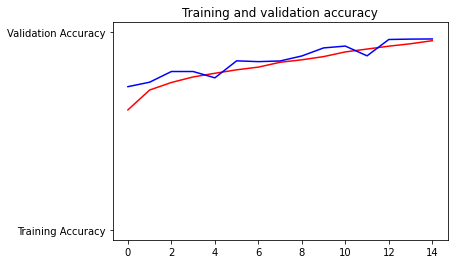

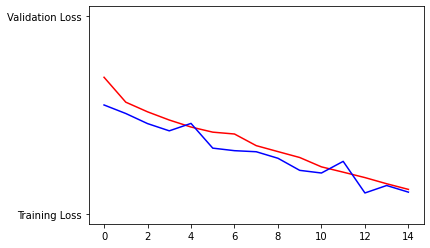

<Figure size 432x288 with 0 Axes>

In [40]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [42]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [48]:
img = image.load_img("./cats-v-dogs/training/cats/10004.jpg", target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("image is a dog")
else:
    print("image is a cat")

[0.]
image is a cat
